In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno 
df = pd.read_csv("data.csv", skiprows = 41)

In [128]:
df = df.drop(df[(df.PSAL < 2)].index)
df = df.drop(df[(df.PSAL > 41)].index)
len(df)

3123100

In [129]:
df = df.drop(df[(df.CPHL < 0)].index)
df = df.drop(df[(df.CPHL > 100)].index)
len(df)

3115646

In [130]:
df = df.drop(df[(df.CDOM < 0)].index)
df = df.drop(df[(df.CDOM > 400)].index)
len(df)

3104591

In [131]:
df = df.drop(df[(df.VBSC < 0)].index)
df = df.drop(df[(df.VBSC > 0.1)].index)
len(df)

3104306

In [132]:
df = df.drop(df[(df.IRRAD555 < 0) ].index)
df = df.drop(df[(df.IRRAD555 > 1000)].index)
len(df)

3101188

In [133]:
df.isnull().sum()

FID                                0
file_id                            0
deployment_name                    0
platform_type                      0
platform_code                      1
time_coverage_start                1
time_coverage_end                  1
TIME                               1
TIME_quality_control               1
LATITUDE                        2077
LATITUDE_quality_control           1
LONGITUDE                       2077
LONGITUDE_quality_control          1
PRES                            6895
PRES_quality_control               1
DEPTH                           7687
DEPTH_quality_control              1
PROFILE                         1556
PROFILE_quality_control            1
PHASE                           7049
PHASE_quality_control              1
TEMP                            1410
TEMP_quality_control               1
PSAL                            7252
PSAL_quality_control               1
DOX1                          641383
DOX1_quality_control               1
D

In [134]:
# df_cc= df[['LATITUDE','LONGITUDE','UCUR']].dropna(axis=0)

In [139]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score
# knn = KNeighborsClassifier(3, weights = 'distance')
# X = df_cc.loc[:,['LATITUDE','LONGITUDE']]
# y = df_cc.loc[:,'UCUR'].astype('int')
# model_3nn = knn.fit(X,y)
# missing_UCUR = df['UCUR'].isnull()
# df_missing_UCUR = pd.DataFrame(df[['LATITUDE','LONGITUDE']].dropna(axis=0)[missing_UCUR])
# imputed_UCUR = model_3nn.predict(df_missing_UCUR)





/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


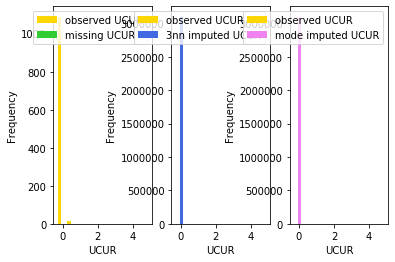

In [174]:
# UCUR_obs = df['UCUR'].dropna()
# UCUR_mis = df['UCUR'][missing_UCUR]
# UCUR_3nn_imp = pd.DataFrame(imputed_UCUR)
# UCUR_3nn_imp = UCUR_3nn_imp.T.squeeze()
# mode_UCUR = df['UCUR'].mode()
# df_mode4UCUR = df.fillna(value = {'UCUR':mode_UCUR[0]})
# UCUR_mode_imp = df_mode4UCUR[['UCUR']][missing_UCUR]
# UCUR_mode_imp = UCUR_mode_imp.T.squeeze()
# legend_1 = ['observed UCUR','missing UCUR']
# legend_2 = ['observed UCUR','3nn imputed UCUR']
# legend_3 = ['observed UCUR','mode imputed UCUR']

# plt.subplot(1,3,1)
# plt.hist([UCUR_obs,UCUR_mis],color=['gold','limegreen'])
# plt.xlabel("UCUR")
# plt.ylabel("Frequency")
# plt.legend(legend_1)

# plt.subplot(1,3,2)
# plt.hist([UCUR_obs,UCUR_3nn_imp],color=['gold','royalblue'])
# plt.xlabel("UCUR")
# plt.ylabel("Frequency")
# plt.legend(legend_2)

# plt.subplot(1,3,3)
# plt.hist([UCUR_obs,UCUR_mode_imp],color=['gold','violet'])
# plt.xlabel("UCUR")
# plt.ylabel("Frequency")
# plt.legend(legend_3)

In [178]:
df.isnull().sum()

FID                                0
file_id                            0
deployment_name                    0
platform_type                      0
platform_code                      1
time_coverage_start                1
time_coverage_end                  1
TIME                               1
TIME_quality_control               1
LATITUDE                        2077
LATITUDE_quality_control           1
LONGITUDE                       2077
LONGITUDE_quality_control          1
PRES                            6895
PRES_quality_control               1
DEPTH                           7687
DEPTH_quality_control              1
PROFILE                         1556
PROFILE_quality_control            1
PHASE                           7049
PHASE_quality_control              1
TEMP                            1410
TEMP_quality_control               1
PSAL                            7252
PSAL_quality_control               1
DOX1                          641383
DOX1_quality_control               1
D

/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6735: RuntimeWarning: All-NaN axis encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6736: RuntimeWarning: All-NaN axis encountered
  xmax = max(xmax, np.nanmax(xi))


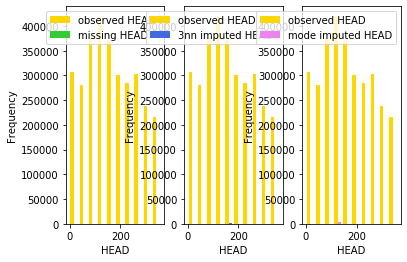

In [192]:
df_cc= df[['LATITUDE','LONGITUDE','PRES','DEPTH','PROFILE','PHASE','TEMP','PSAL','CNDC','HEAD']].dropna(axis=0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(3, weights = 'distance')
X = df_cc.loc[:,['LATITUDE','LONGITUDE','PRES','DEPTH','PROFILE','PHASE','TEMP','PSAL','CNDC']]
y = df_cc.loc[:,'HEAD'].astype('int')
model_3nn = knn.fit(X,y)
missing_HEAD = df['HEAD'].isnull()
df_missing_HEAD = pd.DataFrame(df[['LATITUDE','LONGITUDE','PRES','DEPTH','PROFILE','PHASE','TEMP','PSAL','CNDC']].fillna(df_cc.mean())[missing_HEAD])
imputed_HEAD = model_3nn.predict(df_missing_HEAD)

HEAD_obs = df['HEAD'].dropna()
HEAD_mis = df['HEAD'][missing_HEAD]
HEAD_3nn_imp = pd.DataFrame(imputed_HEAD)
HEAD_3nn_imp = HEAD_3nn_imp.T.squeeze()
mode_HEAD = df['HEAD'].mode()
df_mode4HEAD = df.fillna(value = {'HEAD':mode_HEAD[0]})
HEAD_mode_imp = df_mode4HEAD[['HEAD']][missing_HEAD]
HEAD_mode_imp = HEAD_mode_imp.T.squeeze()
legend_1 = ['observed HEAD','missing HEAD']
legend_2 = ['observed HEAD','3nn imputed HEAD']
legend_3 = ['observed HEAD','mode imputed HEAD']

plt.subplot(1,3,1)
plt.hist([HEAD_obs,HEAD_mis],color=['gold','limegreen'])
plt.xlabel("HEAD")
plt.ylabel("Frequency")
plt.legend(legend_1)

plt.subplot(1,3,2)
plt.hist([HEAD_obs,HEAD_3nn_imp],color=['gold','royalblue'])
plt.xlabel("HEAD")
plt.ylabel("Frequency")
plt.legend(legend_2)

plt.subplot(1,3,3)
plt.hist([HEAD_obs,HEAD_mode_imp],color=['gold','violet'])
plt.xlabel("HEAD")
plt.ylabel("Frequency")
plt.legend(legend_3)

In [190]:
len(imputed_HEAD)

3843

In [185]:
df_missing_HEAD

,LATITUDE,LONGITUDE,PRES,DEPTH,PROFILE,PHASE,TEMP,PSAL,CNDC
7013,-31.8007,114.9833,74.13,73.6016,4921.0,1.0,23.5694,35.3560,5.2085
7014,-31.8006,114.9833,74.42,73.8895,4921.0,1.0,23.5456,35.3561,5.2061
7015,-31.8006,114.9833,74.71,74.1773,4921.0,1.0,23.5190,35.3554,5.2034
7016,-31.8006,114.9833,75.00,74.4652,4921.0,1.0,23.4958,35.3546,5.2009
7017,-31.8006,114.9833,75.31,74.7730,4921.0,1.0,23.4824,35.3525,5.1992
...,...,...,...,...,...,...,...,...,...
3122797,-43.6008,147.7859,14.40,14.2845,652.0,1.0,12.7275,35.2306,4.0947
3122798,-43.6008,147.7859,14.77,14.6515,652.0,1.0,12.7277,35.2307,4.0948
3122799,-43.6008,147.7859,15.14,15.0185,652.0,1.0,12.7279,35.2309,4.0948
3122800,-43.6008,147.7859,15.51,15.3855,652.0,1.0,12.7284,35.2308,4.0949


In [32]:
# df1 = df[df['IRRAD443'].notnull()]
# X = df1['IRRAD443'].values
# y = df1['IRRAD443_quality_control'].values
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
# X_train = np.array(X_train).reshape(-1, 1)
# y_train = np.array(y_train).reshape(-1, 1)
# X_test = np.array(X_test).reshape(-1, 1)

In [33]:
# from sklearn.ensemble import RandomForestRegressor

# regressor = RandomForestRegressor(n_estimators=20, random_state=0)
# regressor.fit(X_train, y_train.ravel())
# y_pred = regressor.predict(X_test)
# y_pred

In [34]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred.round()))
# print(classification_report(y_test,y_pred.round()))
# print(accuracy_score(y_test, y_pred.round()))

In [35]:
# from sklearn.ensemble import RandomForestClassifier
# df1 = df[df['IRRAD443'].notnull()]
# X = df1['IRRAD443'].values
# y = df1['IRRAD443_quality_control'].values
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# X_train = np.array(X_train).reshape(-1, 1)
# y_train = np.array(y_train).reshape(-1, 1)
# X_test = np.array(X_test).reshape(-1, 1)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)



In [36]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))